In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath(".."))

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

from linear_models.classification.logistic_regression import LogisticRegression
# # from polynomial_regression import PolynomialRegression
from linear_models.regression.linear_regression import LinearRegression
# from linear_models.classification.least_squares_classifier import LeastSquareClassifier
# from classification.perceptron import Perceptron


In [14]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, class_sep=2)
y = y.reshape(-1,1)
lr = LogisticRegression(threshold=0.5, optimizer = 'SGD')
lr.fit(X,y,verbose=False, epochs=20, lr=0.01, batch_size = 5)
y_hat = lr.predict(X)

The loss is -1.3372552422361583


<AxesSubplot:>

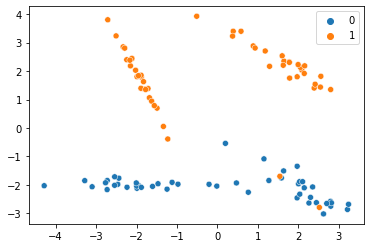

In [15]:
sns.scatterplot(data = X, x = X[:,0], y = X[:,1], hue = y.flatten())

<AxesSubplot:>

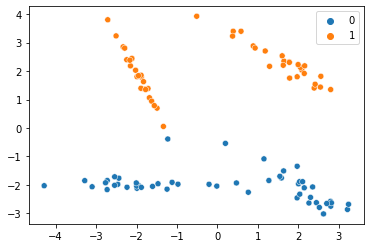

In [16]:
sns.scatterplot(data = X, x = X[:,0], y = X[:,1], hue = y_hat.flatten())

In [4]:
# plt.scatter(X, y)
# y_hat = lin.predict(X)
# plt.scatter(X, y_hat)